<a href="https://colab.research.google.com/github/swethag04/ml-projects/blob/main/used-car-price-analysis/used-car-price-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](/content/sample_data/kurt.jpeg)

### Overview ###

The objective of this analysis is to understand what factors make a car more or less expensive and provide clear recommendations to a used car dealership as to what consumers value in a used car.

The dataset used is from Kaggle and contains information on 426K used cars.

CRISP-DM methodology will be used for this analysis, which consists of the following steps:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment




### Business Understanding

This analysis will focus on answering the following business questions:

1.

### Data Understanding

The data understanding step involves getting familiar with the dataset, data exploration and identifying any quality issues within.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
%matplotlib inline

In [2]:
df = pd.read_csv('/content/sample_data/vehicles.csv')
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [44]:
df.shape

(426880, 18)

The dataset has 426K rows and 17 input features and one target feature ("Price")

In [4]:
# Exploring the data types of the different features
df.dtypes

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

**Exploring the different unique values in each of the categorical variable**

In [19]:
df['manufacturer'].unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [18]:
df['model'].unique()

array([nan, 'sierra 1500 crew cab slt', 'silverado 1500', ...,
       'gand wagoneer', '96 Suburban', 'Paige Glenbrook Touring'],
      dtype=object)

In [17]:
df['condition'].unique()

array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [16]:
df['cylinders'].unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [14]:
df['fuel'].unique()

array([nan, 'gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [21]:
df['drive'].unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [25]:
df['size'].unique()

array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

In [22]:
df['type'].unique()

array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

In [23]:
df['paint_color'].unique()

array([nan, 'white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [24]:
df['state'].unique()

array(['az', 'ar', 'fl', 'ma', 'nc', 'ny', 'or', 'pa', 'tx', 'wa', 'wi',
       'al', 'ak', 'ca', 'co', 'ct', 'dc', 'de', 'ga', 'hi', 'id', 'il',
       'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'mi', 'mn', 'ms', 'mo',
       'mt', 'ne', 'nv', 'nj', 'nm', 'nh', 'nd', 'oh', 'ok', 'ri', 'sc',
       'sd', 'tn', 'ut', 'vt', 'va', 'wv', 'wy'], dtype=object)

**Features in the dataset and their description**

1. **id** : A unique identifier for a car sold
2. **region** : Name of the region where the car was sold
3. **price** : sale price of car
4. **year** : Year of car manufacture
5. **manufacturer** : Car manufacturer
6. **model** : Car model
7. **condition** : Current condition of car (good, excellent, like new, fair, new, salvage and NaN)
8. **cylinders** : Number of cylinders in the car ( 6 cylinders, 4 cylinders, 8 cylinders, 5 cylinders, 10 cylinders, other, 3 cylinders, 12 cylinders)
9. **fuel** : Fuel type (gas, other, diesel, hybrid, electric)
10. **odometer**: odometer reading
11. **title_status** : status of title of car (clean, rebuilt, salvage, lien, missing, parts only)
12. **transmission** : Type of transmission (automtaic, manual, other)
13. **VIN** : VIN of car
14. **drive** : Drive type of car (4wd, fwd, rwd)
15. **size** : car size (full-size, mid-size, compact, sub-compact)
16. **type** : Type of car (sedan, SUV, pickup, truck, other, coupe, htachback, wagon, van, convertible, mini-van, offroad, bus)
17. **paint_color** : paint color of car (white, black, silver, blue, red, grey, green, custom, yellow, orange, purple)
18. **state**: state where car is sold

`id` and `price` are of `int` data type <br>
`year` and `odometer` are of `float` data type <br>
All other remaining attributes are of `object` data type



**Investigating for missing data**


In [26]:
(df.isnull().sum()/df.shape[0])* 100.0

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

In [27]:
# id and VIN columns can be dropped as they are not useful predictors
# size can be dropped as it has 71% missing values
df.drop(columns= ['id', 'VIN', 'size'], inplace=True)

In [28]:
# Dropping rows that have < 5% missing values in columns
df.dropna(subset = ['year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status', 'transmission'], inplace=True)

(389604, 15)

In [29]:
(df.isnull().sum()/df.shape[0])* 100.0

region           0.000000
price            0.000000
year             0.000000
manufacturer     0.000000
model            0.000000
condition       40.369709
cylinders       41.414616
fuel             0.000000
odometer         0.000000
title_status     0.000000
transmission     0.000000
drive           29.536658
type            21.208201
paint_color     28.873934
state            0.000000
dtype: float64

In [30]:
# filling the missing values for these columns as 'other'
df[['condition', 'cylinders', 'drive', 'type', 'paint_color']] = df[['condition', 'cylinders', 'drive', 'type', 'paint_color']].fillna('other')
(df.isnull().sum()/df.shape[0])* 100.0

region          0.0
price           0.0
year            0.0
manufacturer    0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
state           0.0
dtype: float64

In [31]:
df.shape

(389604, 15)

After removing some of the missing data and filling in for missing values for some columns, the dataset now has 389K rows and 15 columns

### Data Preparation

The next step in CRISP-DM process is data preparation. This includes engineering of new features, handling data integrity issues and cleaning, data transformations and preparind the data for modeling.  

**Adding a new feature**

In [32]:
#Creating a new feature age to calculate the age of the car and dropping year column
df['age'] = date.today().year - df['year']
df.drop(['year'], axis=1, inplace=True)

**Looking at the individual data distribution of features**

<Axes: title={'center': 'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

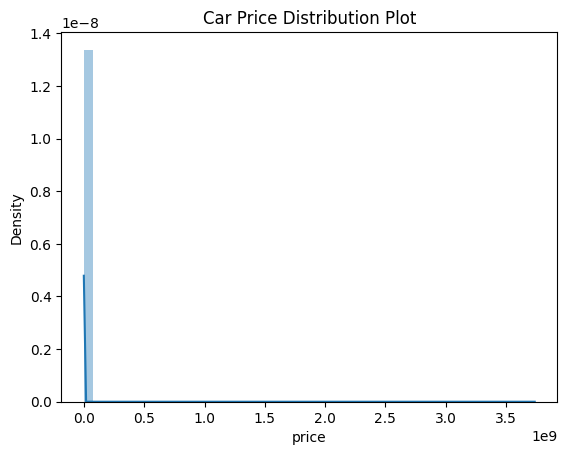

In [33]:
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

In [34]:
df.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90, 0.95, 0.99, 1])

count    3.896040e+05
mean     6.395528e+04
std      1.144865e+07
min      0.000000e+00
25%      5.995000e+03
50%      1.399500e+04
75%      2.659000e+04
85%      3.299500e+04
90%      3.699900e+04
95%      4.398785e+04
99%      6.499900e+04
100%     3.736929e+09
max      3.736929e+09
Name: price, dtype: float64

In [35]:
# Removing the 99th percentile outliers in price to view the distribution better
df = df[df['price'] <= df['price'].quantile(0.99)]

<Axes: title={'center': 'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

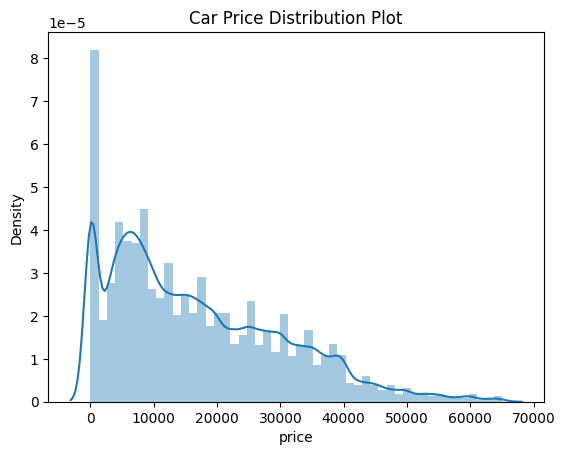

In [36]:
plt.title('Car Price Distribution Plot')
sns.distplot(df.price)

In [37]:
df['price'].describe()

count    385786.000000
mean      16891.533773
std       13591.209308
min           0.000000
25%        5995.000000
50%       13988.000000
75%       25991.000000
max       64999.000000
Name: price, dtype: float64

**After removing the outliers in price, the distribution is more comprehensible**

* Mean price of car sold is USD 16,891 and median price sold is USD 13,988   
* The distribution of prices is right skewed, with mean greater than the median.
* 50% of cars have a price below USD 14,000 while the other half has a price between USD 14,000 - 65,000

<Axes: >

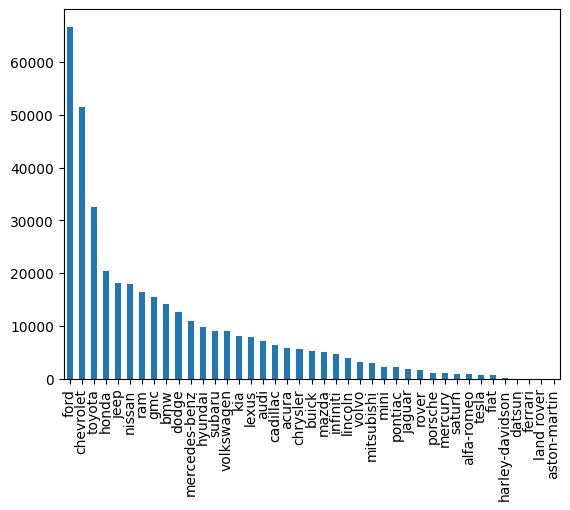

In [84]:
df['manufacturer'].value_counts().plot(kind='bar')


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.